In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import random

In [5]:
data_x = np.load("dataset/data_x_4x4.npy")
data_y = np.load("dataset/data_y_4x4.npy")

In [6]:
shuffle = list(range(len(data_x)))
random.shuffle(shuffle)
data_x = data_x[shuffle]
data_y = data_y[shuffle]

In [32]:
shape = (4,4)
print(data_y.shape)
print(data_x.shape)

(65536, 4, 4)
(65536, 16)


In [8]:
data_x[0]/shape[0]

array([0.33333333, 0.        , 0.33333333, 0.        , 0.66666667,
       0.        , 0.66666667, 0.        , 0.        , 0.        ,
       0.33333333, 0.66666667, 1.        , 0.        , 0.        ,
       0.        ])

In [9]:
data_y[0]*2-1

array([[-1,  1, -1, -1],
       [-1, -1,  1, -1],
       [-1,  1,  1, -1],
       [-1,  1,  1, -1]])

In [33]:
print(len(np.unique(data_y, axis=0)))
print(len(np.unique(data_x, axis=0)))
print(len(np.unique(data_y, axis=0))-len(np.unique(data_x, axis=0)))

65536
58196
7340


In [10]:
split = 1-0.00

In [11]:
train_x = data_x[:int(len(data_x)*split)]/shape[0]
test_x = data_x[int(len(data_x)*split):]/shape[0]
train_y = data_y[:int(len(data_y)*split)]*2-1
test_y = data_y[int(len(data_y)*split):]*2-1

print(train_x.shape)
print(test_x.shape)

(65536, 16)
(0, 16)


In [12]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.models import Model
from keras.callbacks import TensorBoard

In [13]:
import winsound

In [14]:
activations = ["softmax", 
               "elu", 
               "selu", 
               "softplus", 
               "softsign", 
               "relu", 
               "tanh", 
               "sigmoid", 
               "hard_sigmoid", 
               "exponential", 
               "linear"]

In [15]:
optimizers = ["SGD", 
              "RMSprop", 
              "Adagrad", 
              "Adadelta", 
              "Adam", 
              "Adamax", 
              "Nadam"]

In [16]:
losses = ["mean_squared_error", 
          "mean_absolute_error", 
          "mean_absolute_percentage_error", 
          "mean_squared_logarithmic_error", 
          "squared_hinge", 
          "hinge", 
          "categorical_hinge", 
          "logcosh", 
#           "categorical_crossentropy", 
#           "sparse_categorical_crossentropy", 
          "binary_crossentropy", 
          "kullback_leibler_divergence", 
          "poisson", 
          "cosine_proximity"]

In [72]:
optimizers = ["Nadam"]
losses = ["cosine_proximity"]
activations = ["elu"]

for i in optimizers:
    for j in losses:
        for l in activations:
            print(i+"&"+j+"&"+l)

            main_input = Input(shape=data_x.shape[1:], name='main_input')
            x = Dense(shape[0]*shape[1]*12, activation="tanh")(main_input)
    #         y = keras.layers.concatenate([x, main_input])
    #         y = Dense(shape[0]*shape[1], activation='tanh')(y)
    #         z = keras.layers.concatenate([y, main_input])
    #         z = Dense(shape[0]*shape[1], activation='tanh')(z)
    #         w = keras.layers.concatenate([z, main_input])
    #         w = Dense(shape[0]*shape[1], activation='tanh')(w)
#             x = Dense(shape[0]*shape[1], activation=l)(x)
            x = Dense(shape[0]*shape[1], activation='tanh')(x)
            main_output = Reshape(shape, name='main_output')(x)

            model = Model(main_input, main_output)

    #         model.summary()

            model.compile(optimizer=i, loss=j, metrics=['accuracy'])

    #         tensorboard = TensorBoard(log_dir="logs/{}".format(i+"_"+j))

    #         history = model.fit(train_x, train_y, epochs=20, batch_size=1, verbose=0, validation_data=(test_x, test_y), callbacks=[tensorboard])
            history = model.fit(train_x, train_y, epochs=12800, batch_size=320, verbose=0, validation_data=(test_x, test_y))

            count = 0
            for k in range(len(train_x)):
            #     print(i)
            #     print(data_x[i])
                x = train_x[k].reshape((1,-1))
                pred = model.predict(x)
                y = train_y[k]
                if np.array_equal(np.round((pred+1)/2)[0],(y+1)/2) == False:
            #         print(i)
            #         print((y+1)/2)
            #         print(np.round((pred+1)/2)[0])
                    count+=1
            print(count)

Nadam&cosine_proximity&elu


C:\Users\windows\Anaconda3\envs\picture_cross\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113002). Check your callbacks.
  % delta_t_median)


15229


In [73]:
duration = 1000  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)

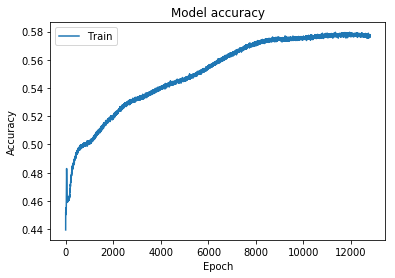

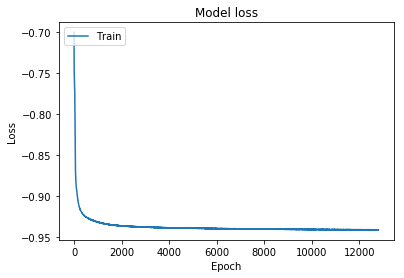

In [74]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [75]:
model.save("model_4x4.h5")

In [99]:
# for i in range(len(data_x)):
count = 0
for i in range(len(train_x)):
#     print(i)
#     print(data_x[i])
    x = train_x[i].reshape((1,-1))
    pred = model.predict(x)
    y = train_y[i]
    if np.array_equal(np.round((pred+1)/2)[0],(y+1)/2) == False:
        print(i)
        print((y+1)/2)
        print(np.round((pred+1)/2)[0])
        count+=1
print(count)

6
[[0. 1. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
8
[[0. 1. 1.]
 [0. 0. 0.]
 [1. 0. 0.]]
[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
13
[[0. 0. 1.]
 [0. 0. 0.]
 [1. 1. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]]
16
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
17
[[0. 1. 1.]
 [0. 1. 1.]
 [1. 1. 0.]]
[[0. 1. 1.]
 [0. 1. 1.]
 [0. 1. 1.]]
20
[[1. 1. 1.]
 [0. 1. 0.]
 [1. 1. 0.]]
[[1. 1. 0.]
 [0. 1. 0.]
 [1. 1. 0.]]
24
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
27
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
35
[[1. 1. 0.]
 [1. 1. 1.]
 [0. 0. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]]
36
[[1. 1. 0.]
 [0. 1. 1.]
 [0. 0. 1.]]
[[0. 1. 1.]
 [0. 1. 1.]
 [0. 0. 0.]]
41
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
43
[[1. 0. 0.]
 [0. 1. 1.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [1. 1. 1.]
 [0. 0. 1.]]
54
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 1.]]
[[0. 0. 0.]
 [0. 1. 0.]
 [1. 1. 1.]]
5

423
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 1.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [1. 1. 1.]]
426
[[0. 0. 0.]
 [0. 0. 1.]
 [1. 1. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]]
427
[[1. 0. 0.]
 [1. 1. 1.]
 [0. 1. 1.]]
[[0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]]
428
[[1. 1. 0.]
 [0. 1. 0.]
 [1. 1. 1.]]
[[1. 1. 0.]
 [0. 1. 0.]
 [1. 1. 0.]]
429
[[1. 0. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]
[[0. 0. 0.]
 [1. 0. 1.]
 [0. 0. 0.]]
440
[[1. 1. 1.]
 [1. 1. 1.]
 [0. 1. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]]
452
[[1. 1. 0.]
 [1. 1. 0.]
 [0. 1. 1.]]
[[1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]]
455
[[0. 0. 1.]
 [1. 1. 1.]
 [1. 1. 0.]]
[[0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]]
456
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
460
[[0. 1. 1.]
 [1. 1. 0.]
 [1. 0. 0.]]
[[1. 1. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]
464
[[0. 1. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
466
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
469
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]